In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
# load LDA model
with open('models/lda_model_150.pkl', 'rb') as f:
    lda_model = pickle.load(f)

In [153]:
# load dataframe containing topics
df = pd.read_pickle('C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/data_topics.pkl')

In [154]:
# add year column
df['year'] = df['date'].dt.year

In [155]:
df.head()

,text,date,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year
0,Sehr geehrter Herr Alterspräsident! So muss ...,2021-10-26,Gabriele Katzmarek,female,None,SPD,[(Beifall bei der SPD sowie bei Abgeordneten d...,SP-2021-0,1299,2593,{68: 0.3588338},2021
1,Herr Präsident! Liebe Kolleginnen und Kolleg...,2021-10-26,Stefan Müller,male,None,CDU/CSU,[(Beifall bei der CDU/CSU sowie bei Abgeordnet...,SP-2021-1,4028,3796,{68: 0.46662897},2021
2,Sehr geehrter Herr Alterspräsident Wolfgang ...,2021-10-26,Britta Haßelmann,female,None,BÜNDNIS 90/DIE GRÜNEN,[(Beifall beim BÜNDNIS 90/DIE GRÜNEN und bei d...,SP-2021-2,451,4301,{68: 0.2632997},2021
3,Sehr geehrter Herr Präsident! Meine lieben K...,2021-10-26,Marco Buschmann,male,None,FDP,"[(Jan Korte [DIE LINKE]: Oder Jugendweihe!), (...",SP-2021-3,3083,4555,{},2021
4,Herr Alterspräsident! Lassen Sie mich zunäch...,2021-10-26,Stephan Brandner,male,None,AfD,"[(Beifall bei der AfD), (Beifall bei Abgeordne...",SP-2021-4,4055,5996,{68: 0.3100206},2021


In [156]:
topics_of_interest = {
    14: 'Jugend und Förderung',
    115: 'Gleichberechtigung',
    37: 'Militär',
    126: 'Rente und Sozialpolitik',
    129: 'Russland-Ukraine-Konflikt',
    118: 'Entwicklungspolitik ',
    135: 'Energie und Klima',
    148: 'Kinder und Familienpolitik',
    2: 'Strafe und Verbrechen',
    25: 'Gesundheitswesen ',
    26: 'Umweltschutz ',
    46: 'Bildungspolitik ',
    5: 'Familienrecht ',
    32: 'Kultur',
    131: 'Schwangerschaftsabbruch ',
    106: 'Corona',
    0: 'Gesundheitsrisiken'
}

# Historical Development of Speeches in Topic

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]
    speeches_per_year = filtered_df.groupby('year').size()

    plt.figure(figsize=(10, 6))
    plt.bar(speeches_per_year.index, speeches_per_year.values, color='skyblue')
    plt.title(f'Chronological Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Number of Speeches')
    plt.xticks(rotation=45)
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_yearly/{topic_title}.png')

# Topic by Speaker Gender

In [ ]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    speeches_per_gender = filtered_df.groupby('speaker_gender').size()
    sum_speeches = speeches_per_gender.sum()

    plt.figure(figsize=(10, 6))
    bar = plt.bar(speeches_per_gender.index, speeches_per_gender.values/sum_speeches*100, color='skyblue')
    plt.title(f'Gender Topic Distribution for "{topic_title}"')
    plt.xlabel('Speaker Gender')
    plt.ylabel('Distribution of Speeches in %')
    plt.xticks(rotation=45)
    plt.ylim(top=100)
    plt.bar_label(bar, label_type='edge', fmt='{:0.0f}%')
    plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender/{topic_title}.png')

# Historical Development of Speeches by Gender

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


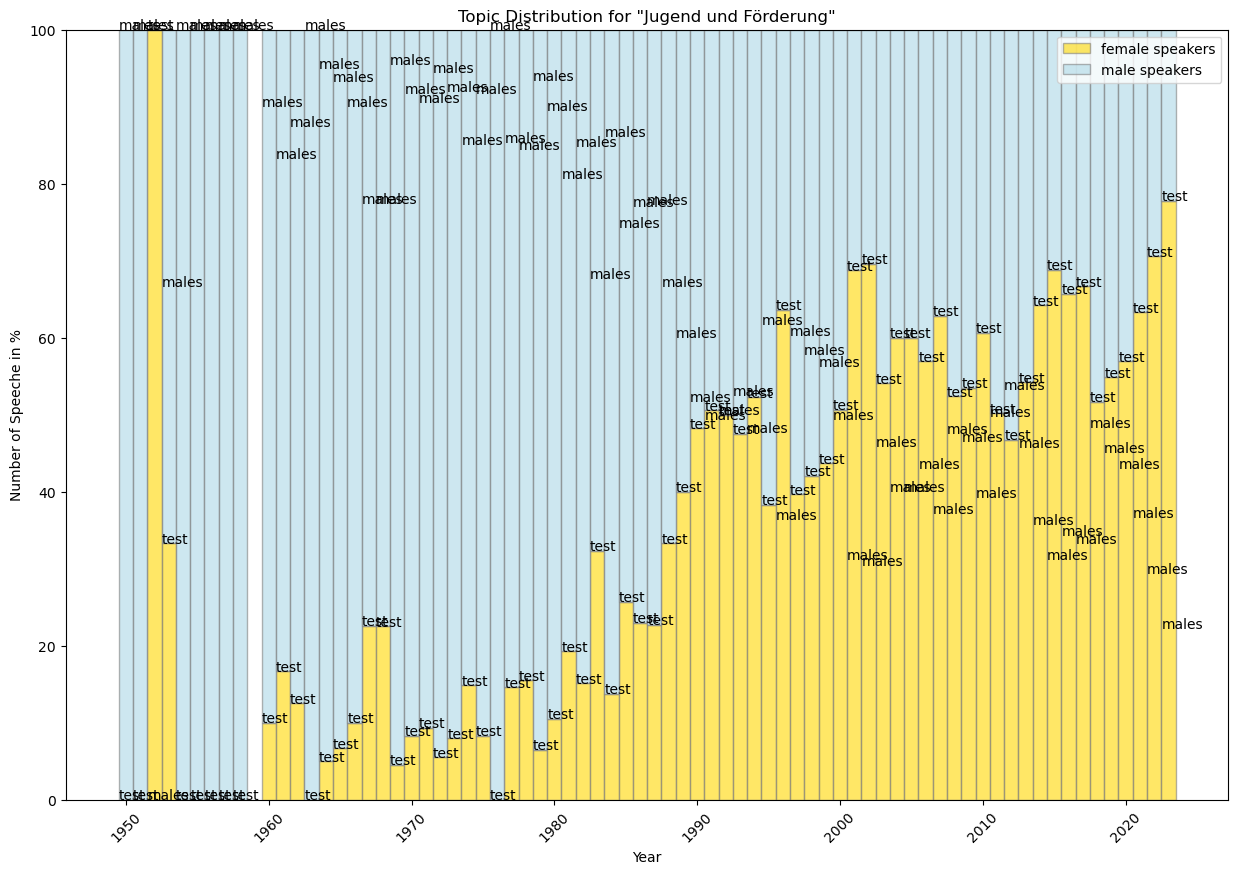

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


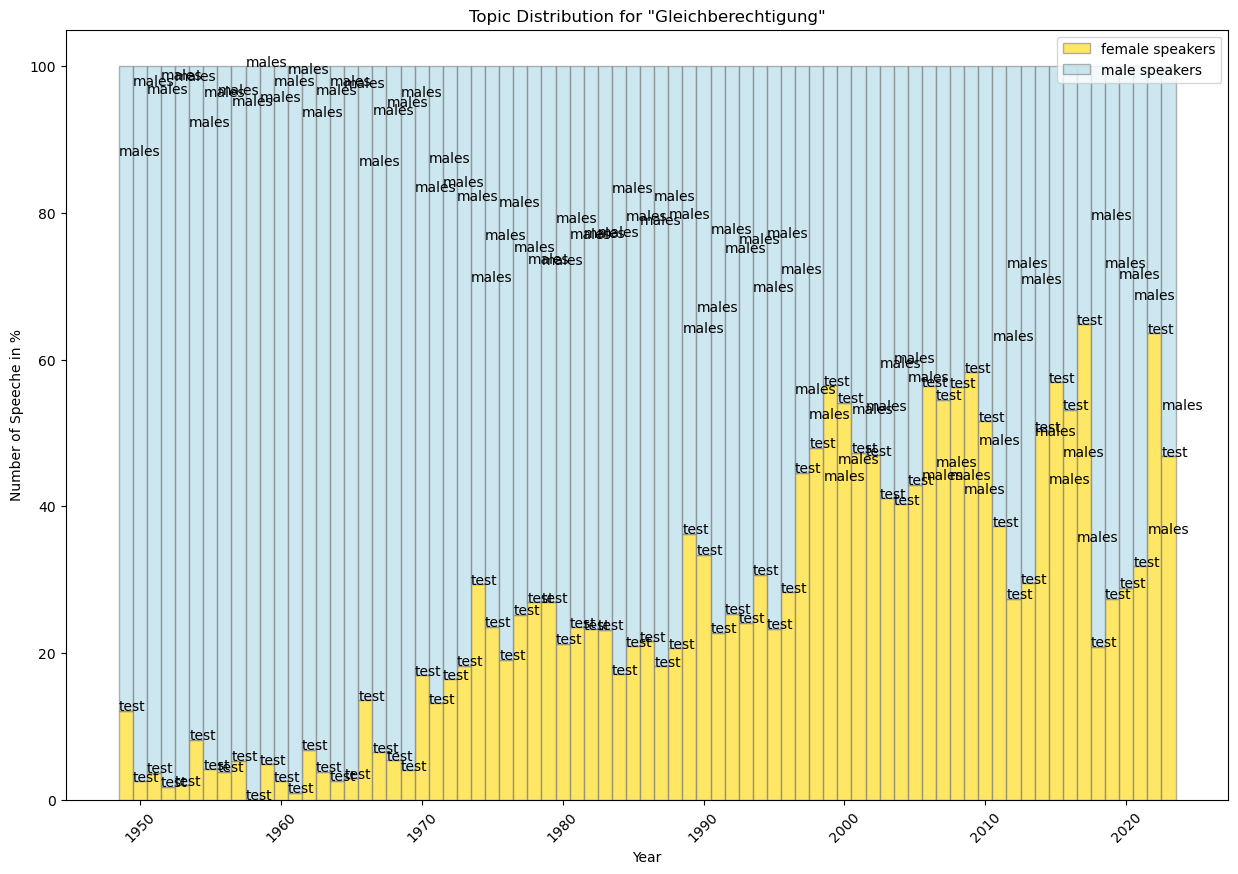

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


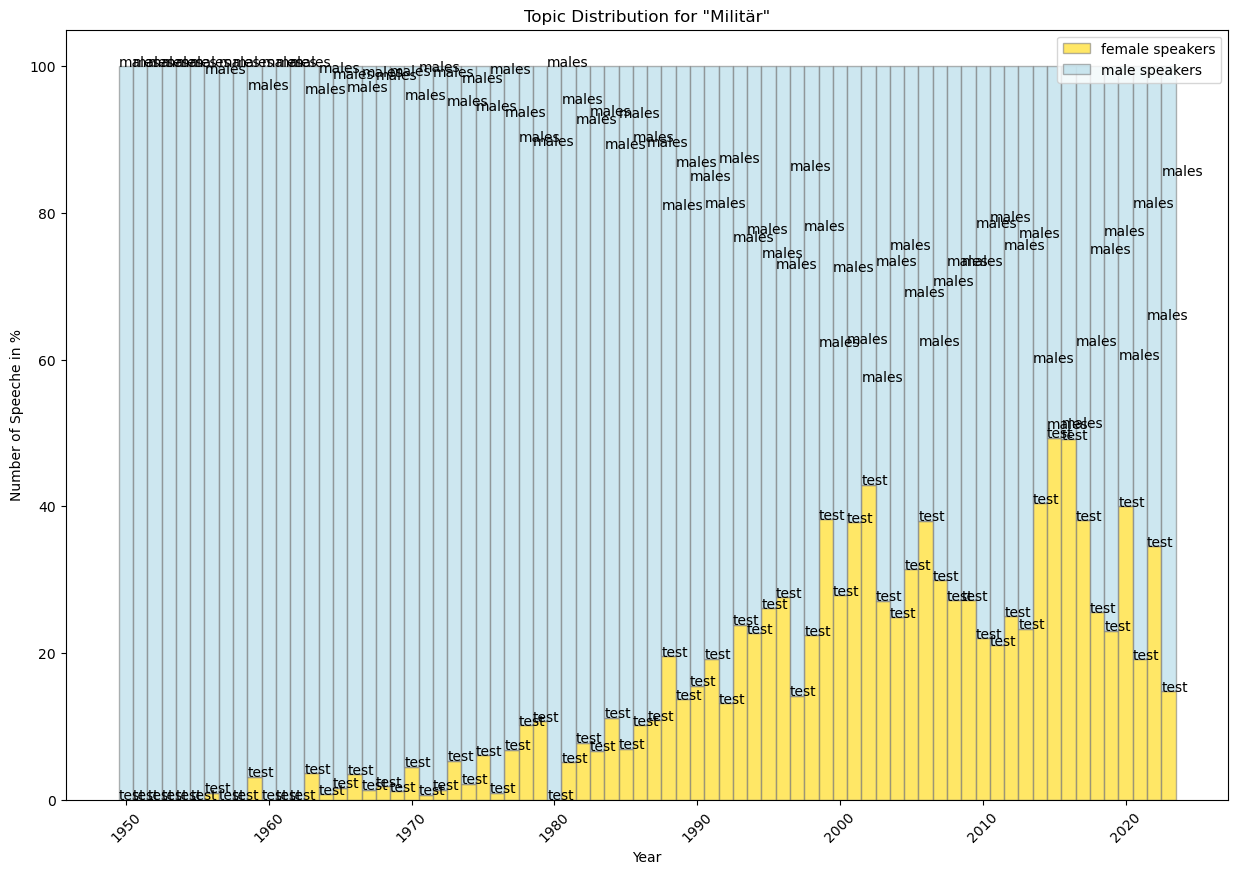

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


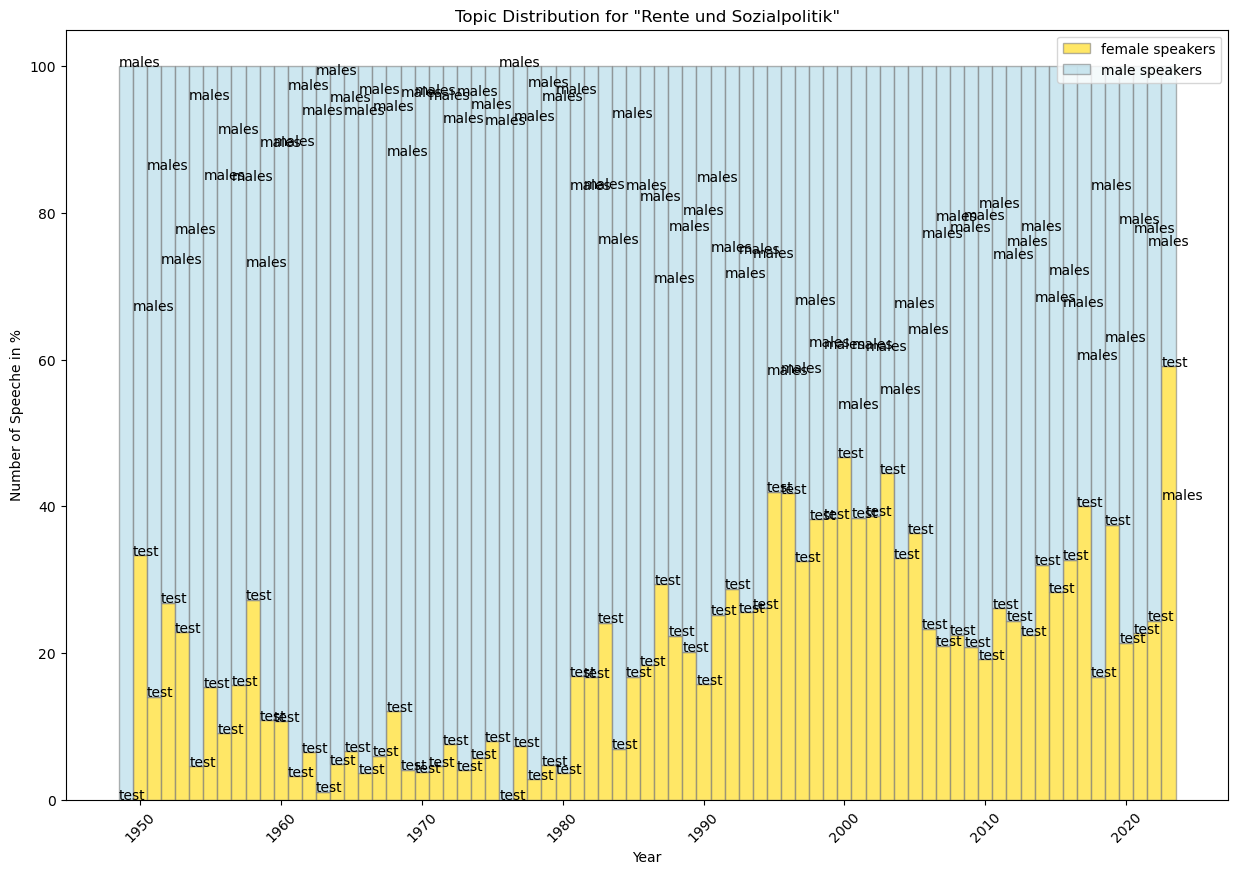

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


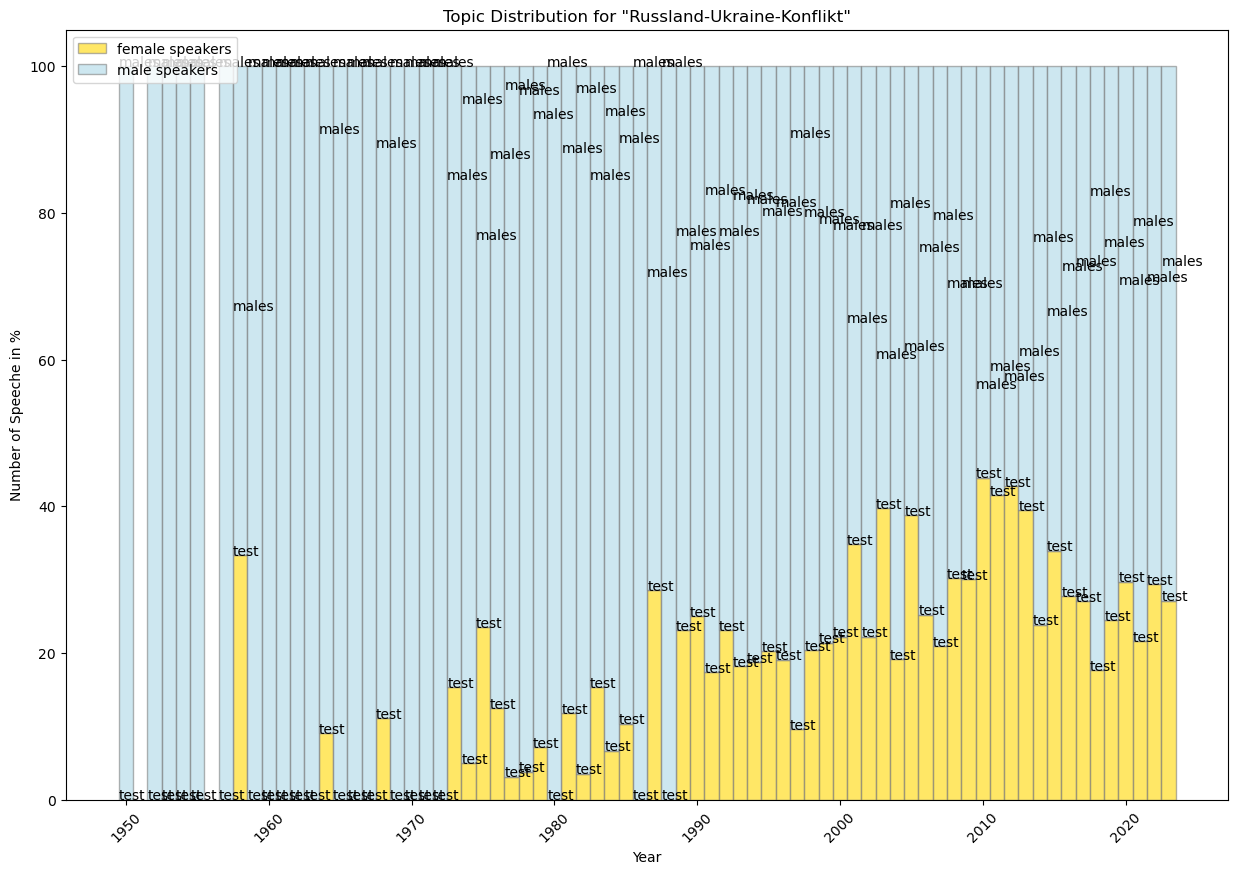

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


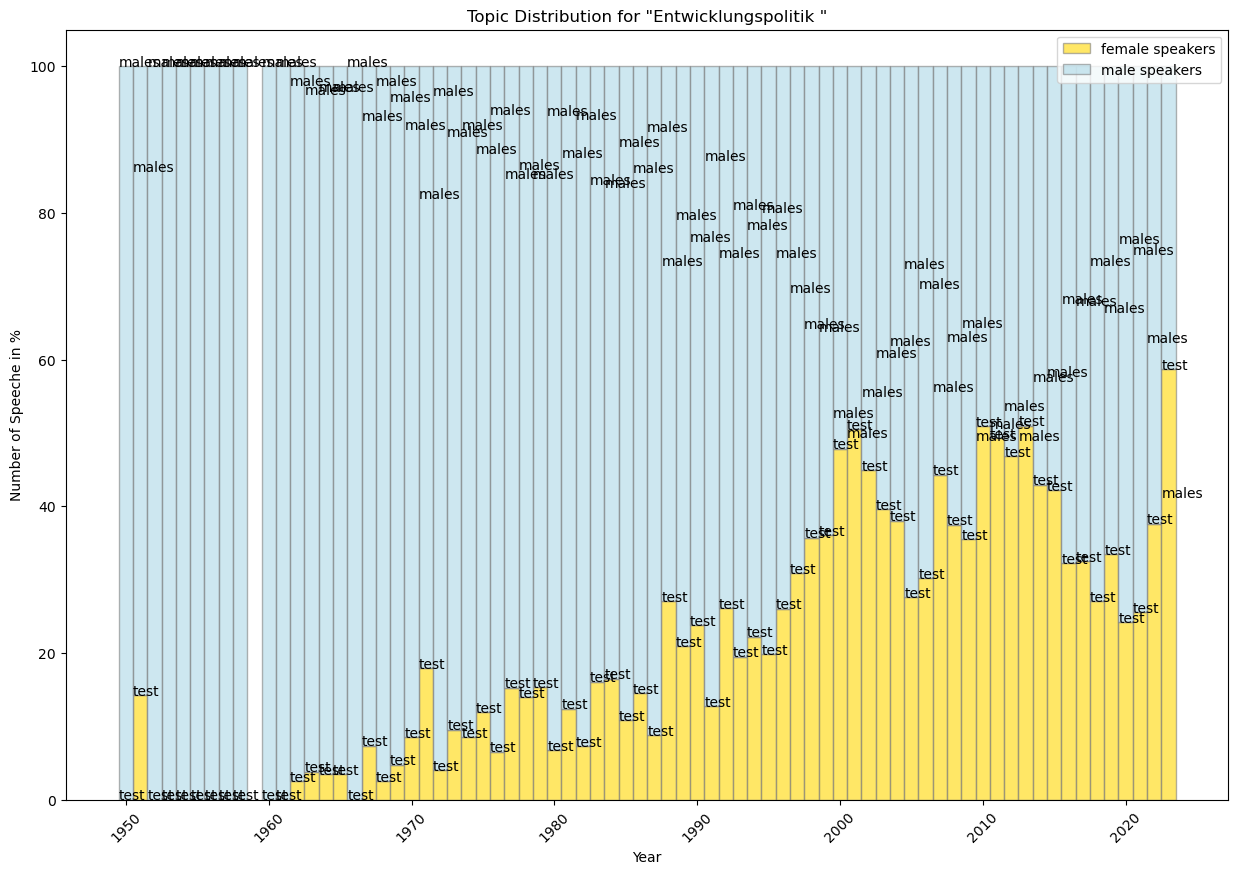

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


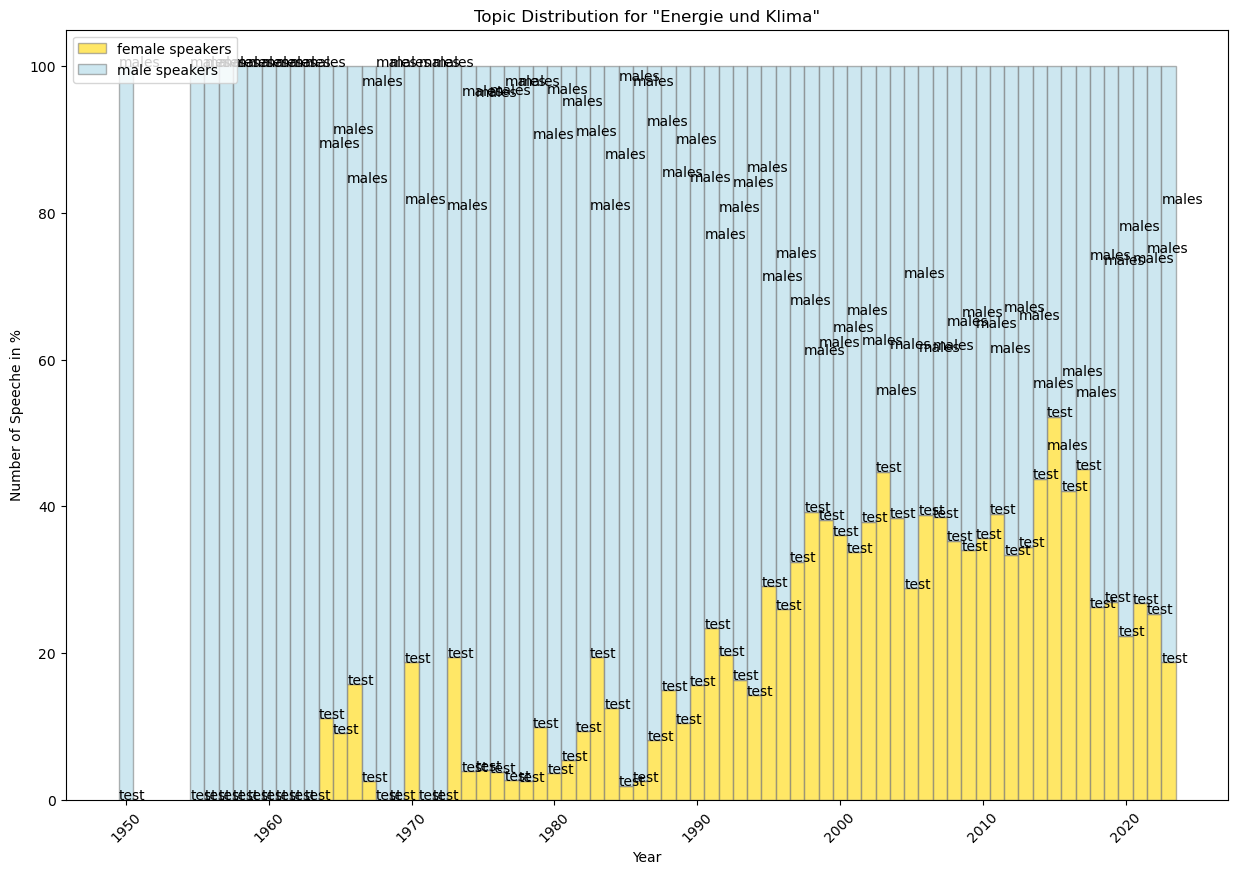

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


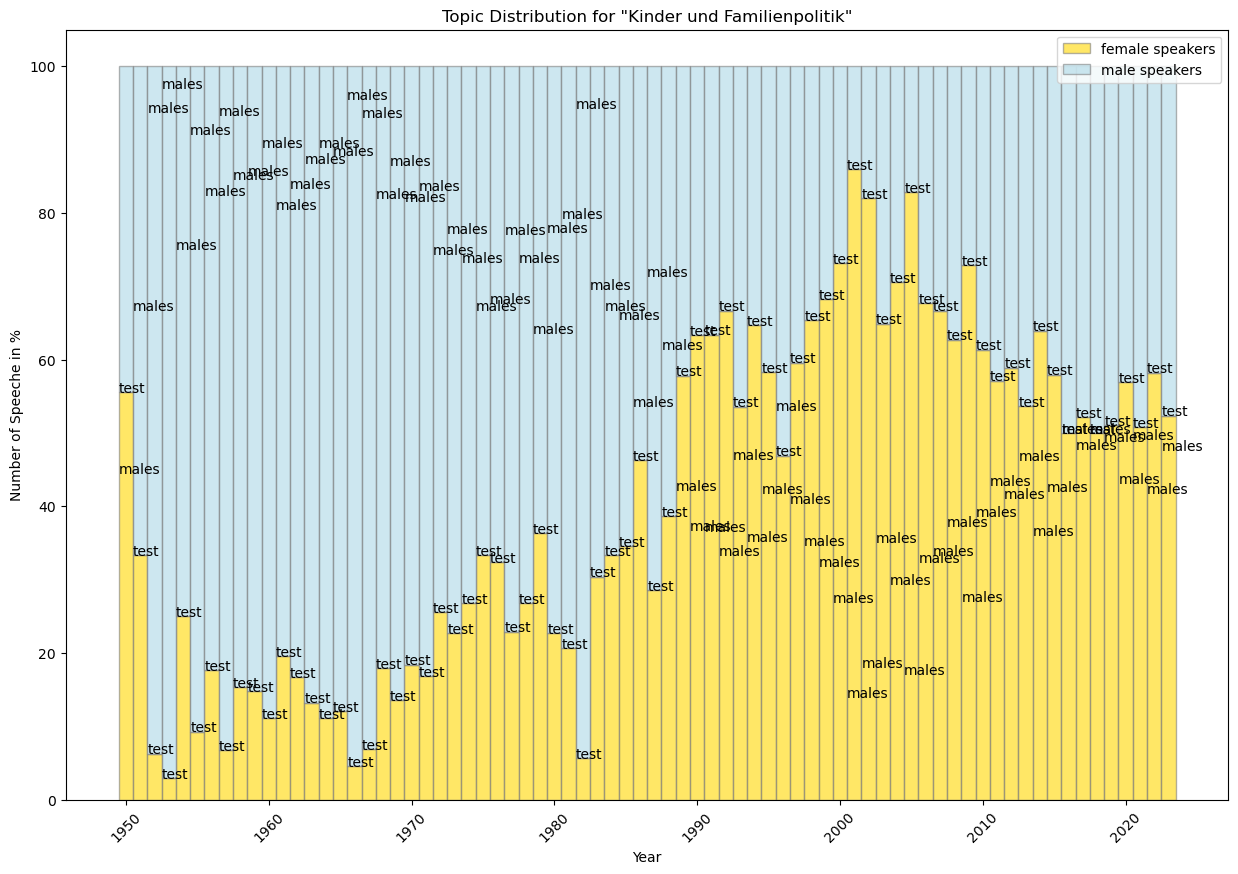

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


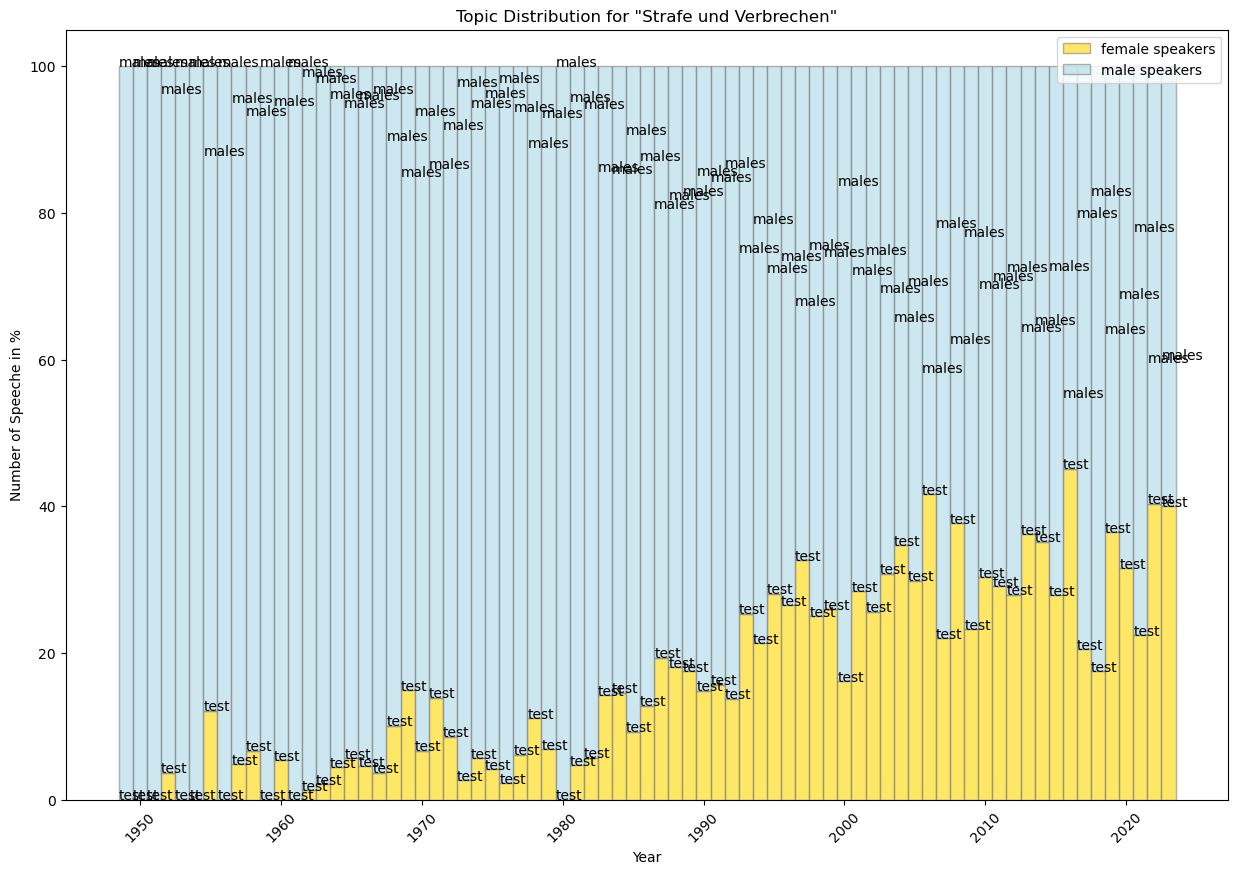

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


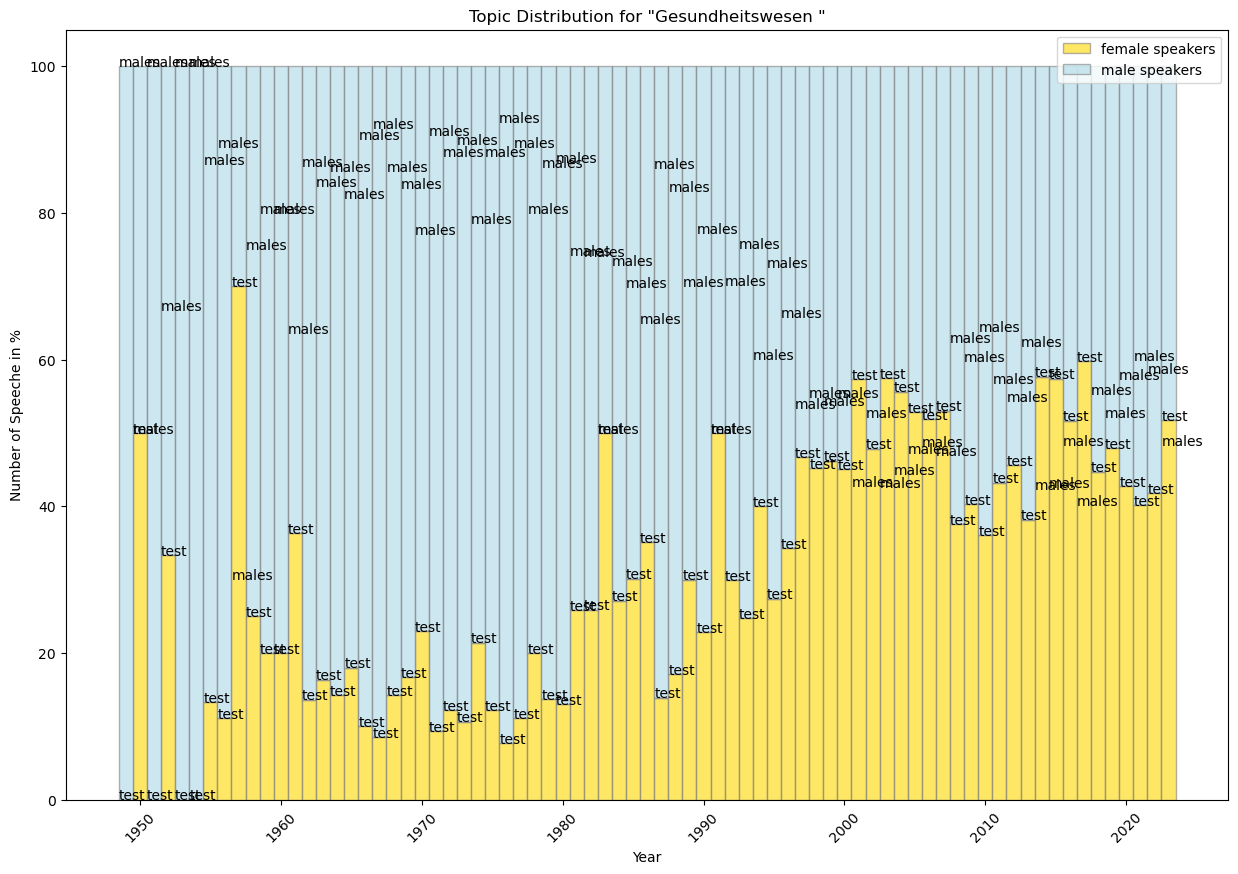

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


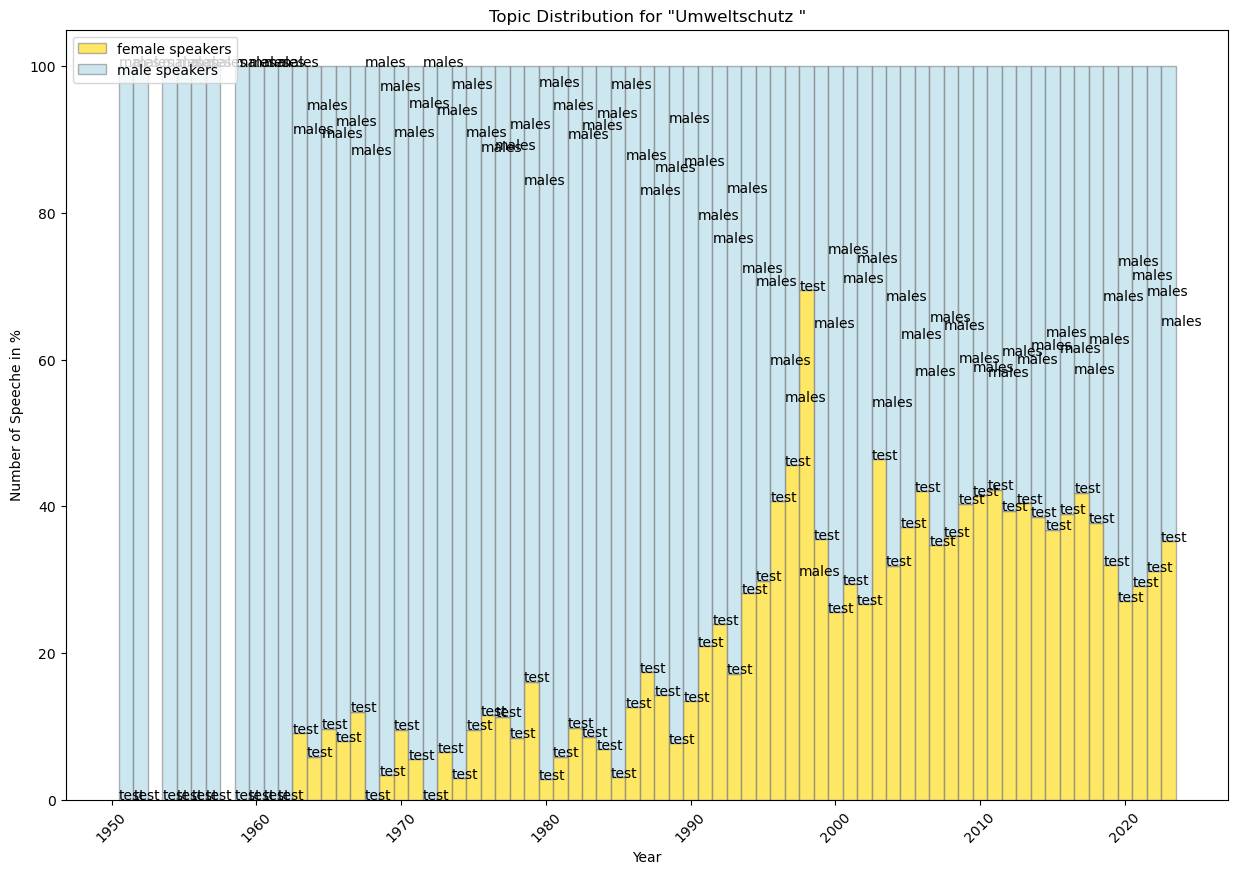

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


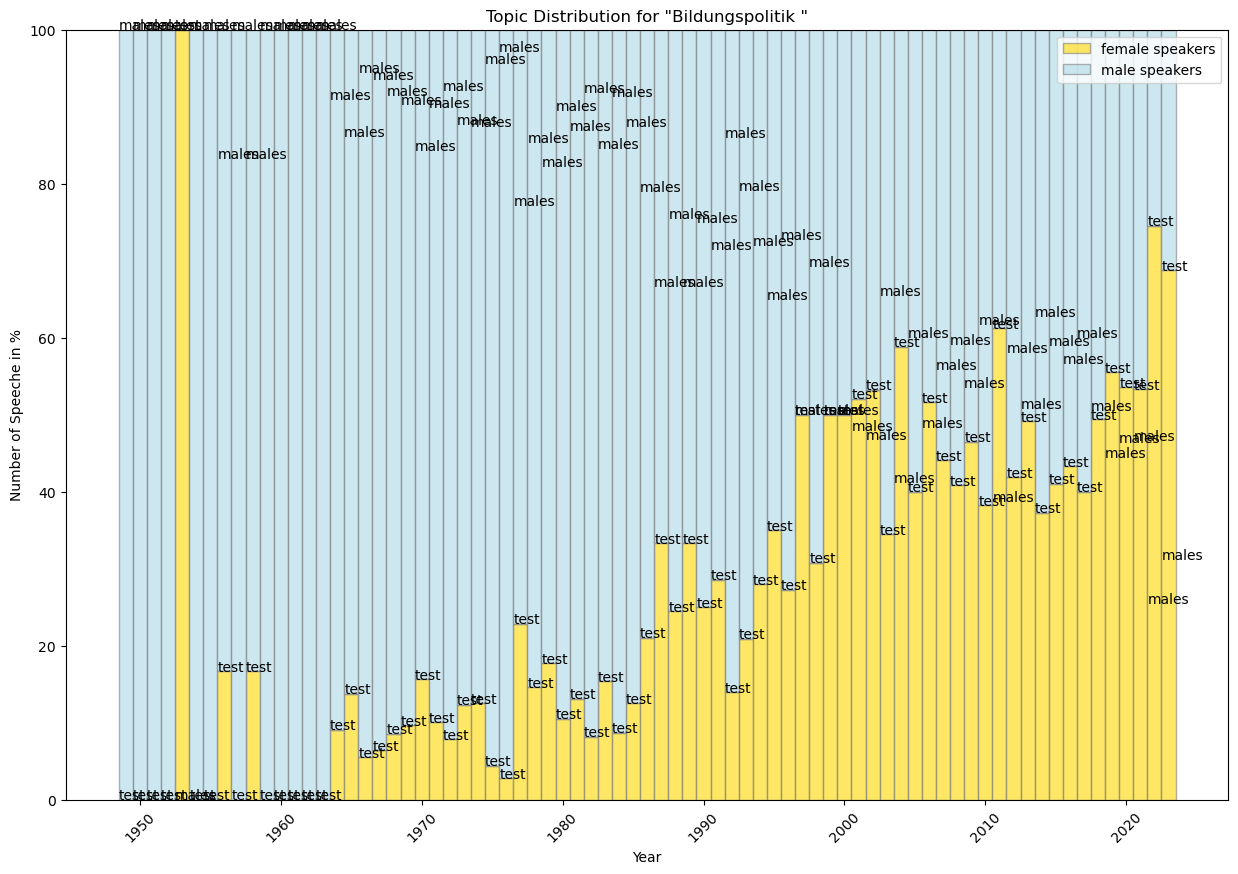

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


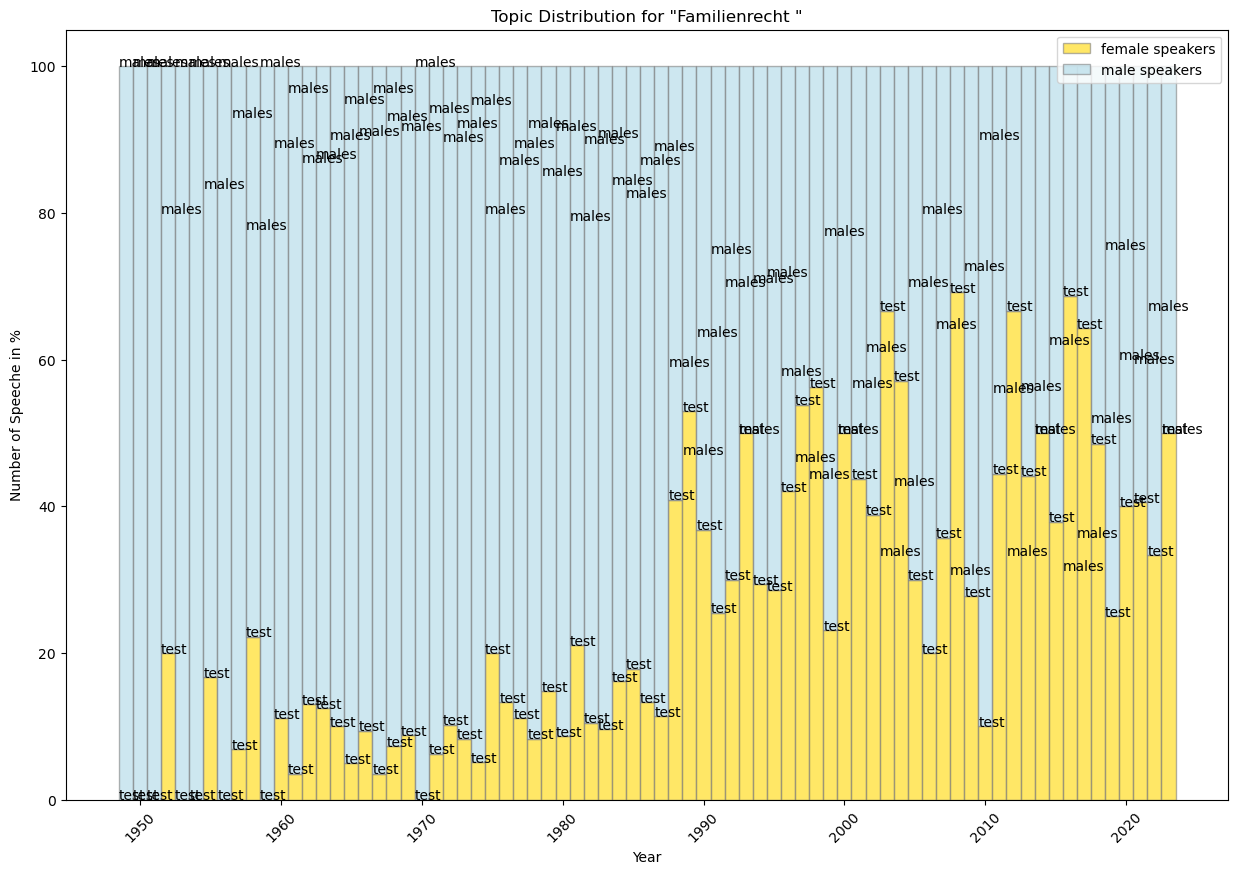

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


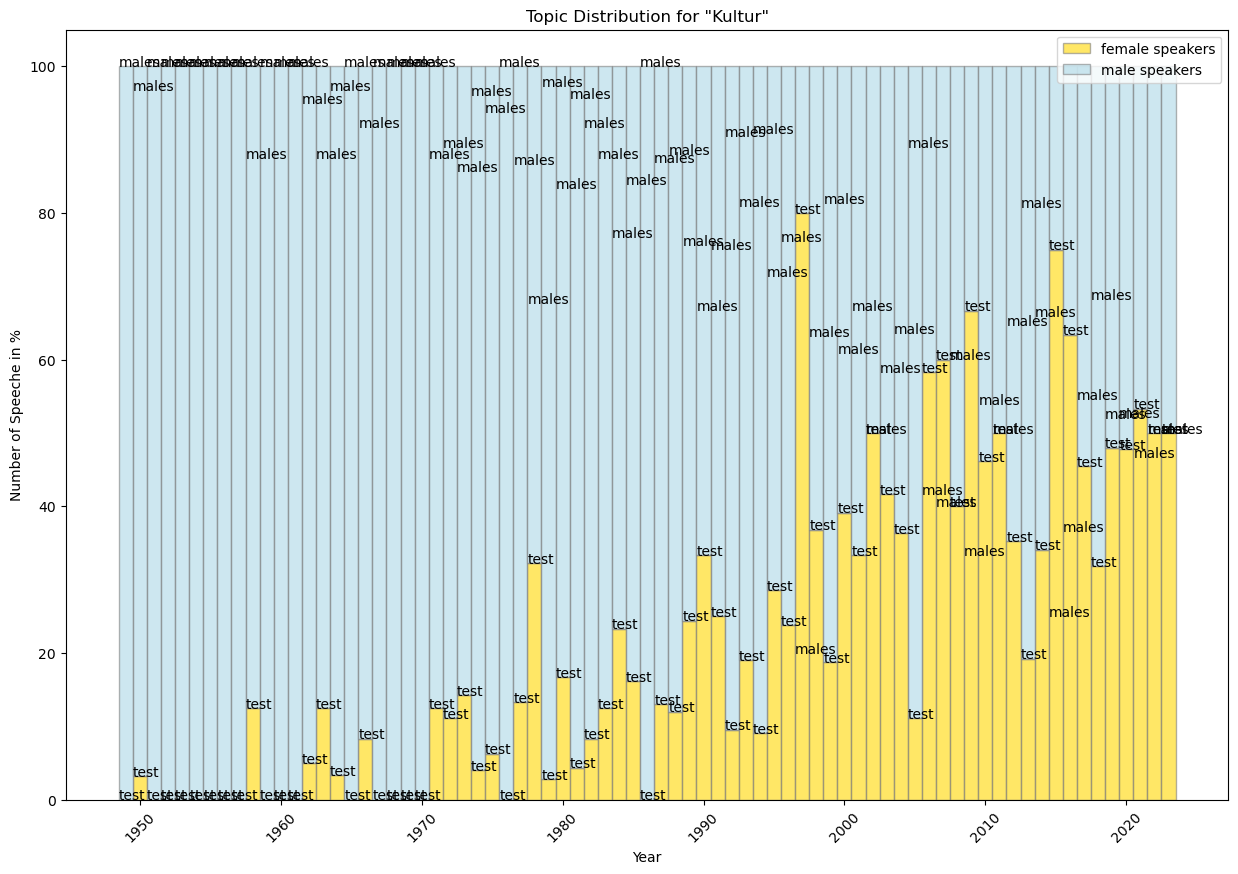

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


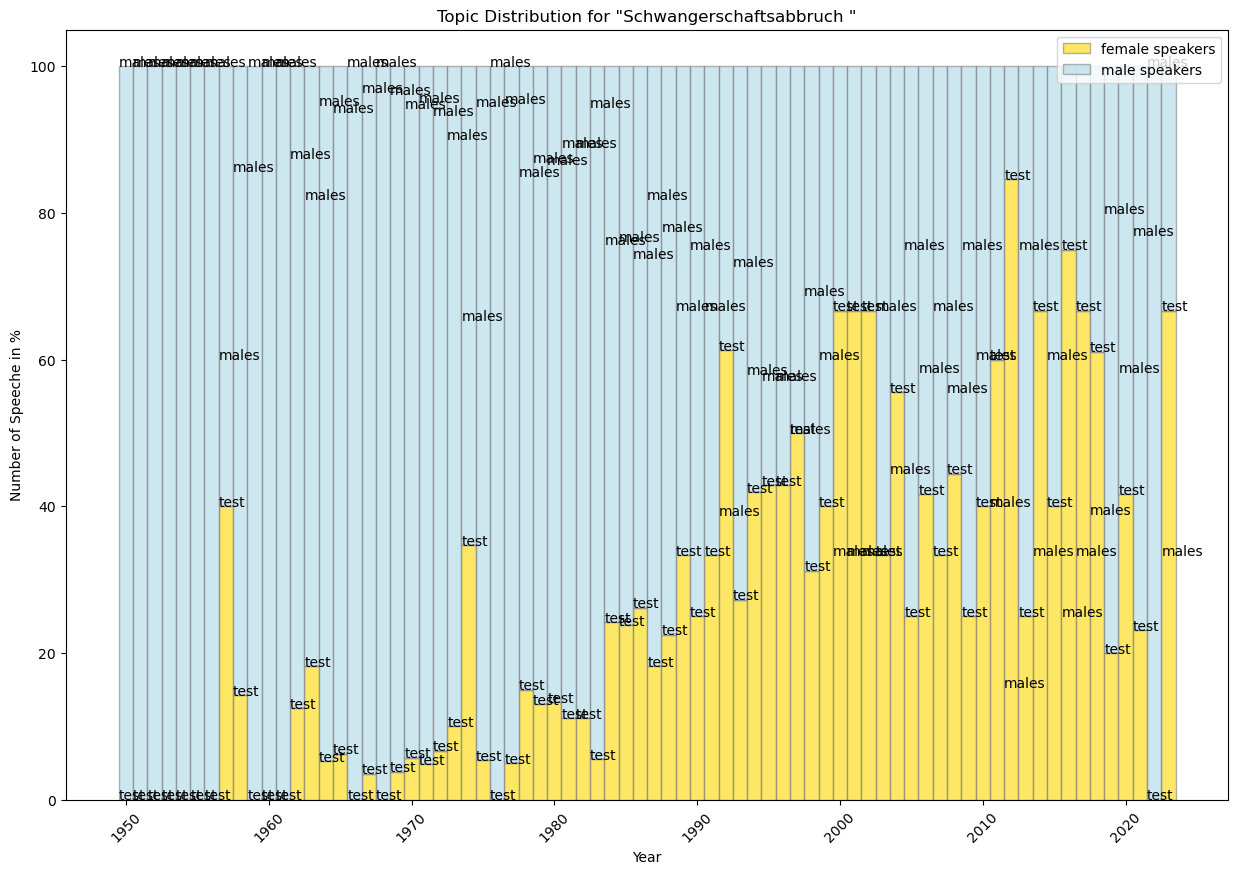

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


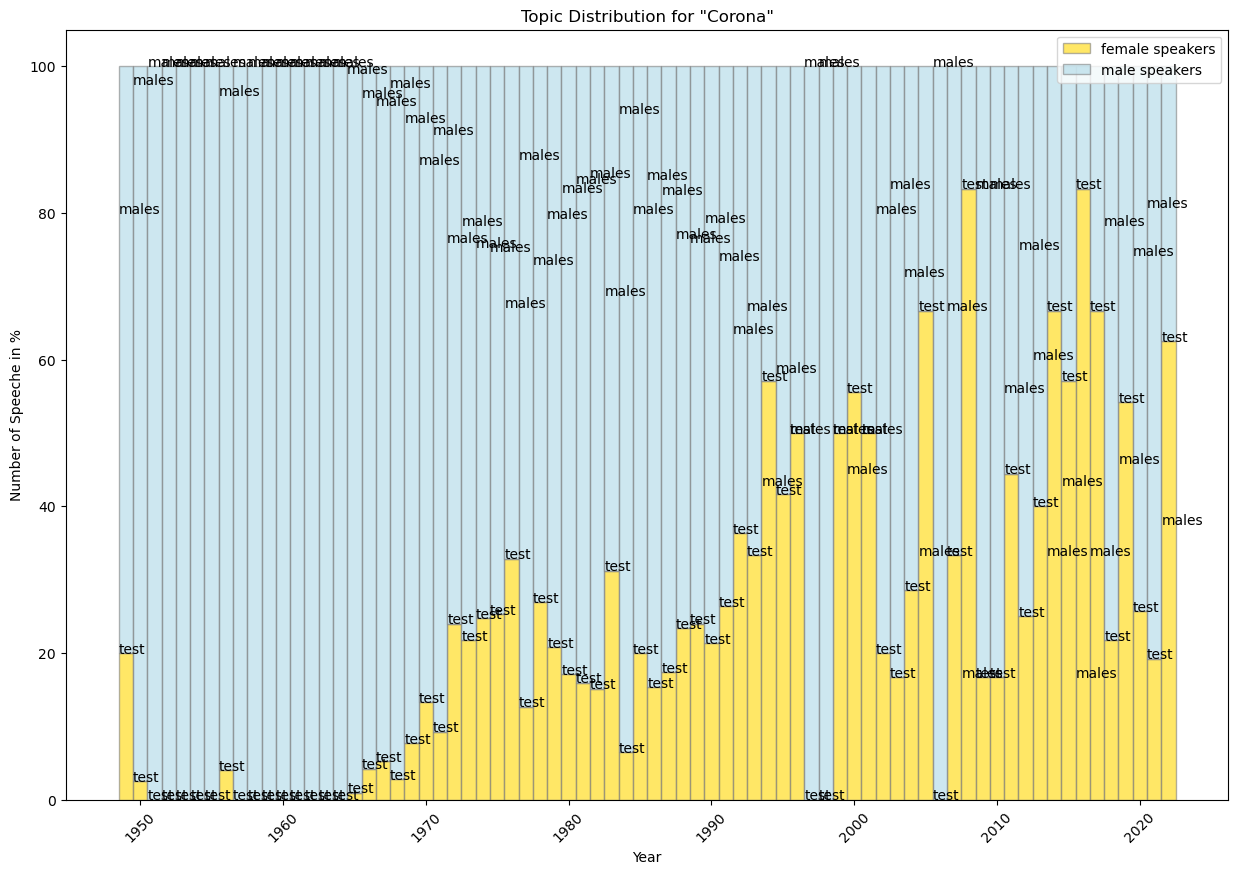

C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_speech_count.append(gender[0] if gender[0] > 0 else 0)
C:\Users\Ana\AppData\Local\Temp\ipykernel_21696\1197450375.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_speech_count.append(gender[1] if gender[1] > 0 else 0)


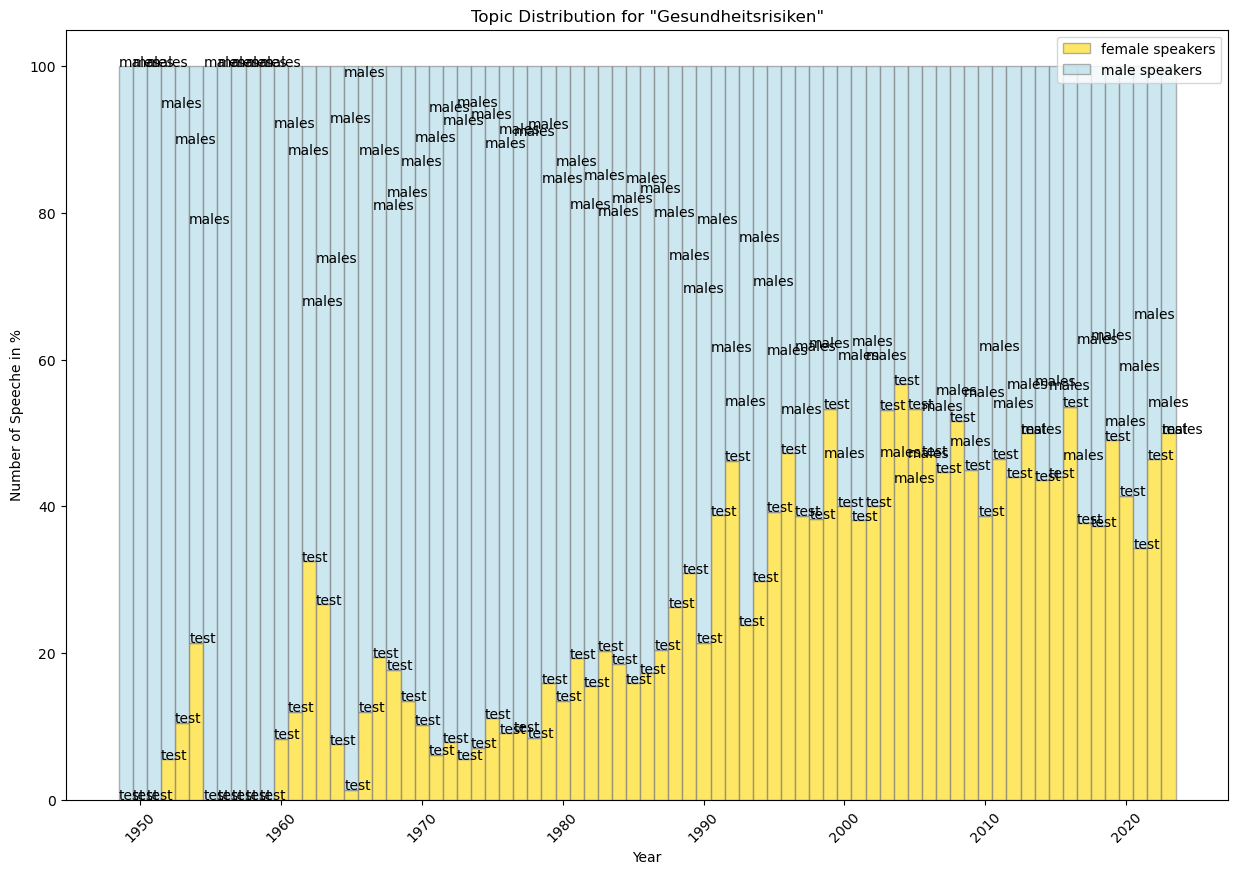

In [222]:
for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    speeches_per_year = filtered_df.groupby('year').size()

    grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

    years = []
    female_speech_count = []
    male_speech_count = []

    for year, gender in grouped_df.items():
        years.append(year)
        female_speech_count.append(gender[0] if gender[0] > 0 else 0)
        male_speech_count.append(gender[1] if gender[1] > 0 else 0)

    relative_female_speeches = female_speech_count/speeches_per_year*100
    relative_male_speeches = male_speech_count/speeches_per_year*100

    plt.figure(figsize=(15, 10))
    bar_fem = plt.bar(years,
                      relative_female_speeches, 
                      color='gold', 
                      width=1, 
                      edgecolor='grey', 
                      label='female speakers',
                      alpha=0.6
                      )
    bar_male = plt.bar(years,
                       relative_male_speeches,
                       bottom=relative_female_speeches, 
                       color='lightblue', 
                       width=1, 
                       edgecolor='grey', 
                       label='male speakers',
                       alpha=0.6
                       )
    
    # bar = plt.bar(speeches_per_gender.index, speeches_per_gender.values/sum_speeches*100, color='skyblue')
    plt.title(f'Topic Distribution for "{topic_title}"')
    plt.xlabel('Year')
    plt.ylabel('Number of Speeche in %')
    plt.xticks(rotation=45)
    plt.legend()

    # set custom bar labels # TODO
    for bar in bar_fem:
        plt.text(bar.get_x(), bar.get_height(), s='test')

    for bar in bar_male:
        plt.text(bar.get_x(), bar.get_height(), s='males')

    plt.show()
    # plt.savefig(f'C:/Users/Ana/OneDrive - Hochschule Düsseldorf/MA/Plots/topics_gender/{topic_title}.png')

In [219]:
print(relative_female_speeches.values + relative_male_speeches.values)

[100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100.]


## Test if missing years are correct

In [158]:
filtered_df = df[df['topic_distribution'].apply(lambda topics: 14 in topics)]
grouped_df = filtered_df.groupby(['year', 'speaker_gender']).size().unstack(level=0)

speeches_per_year = filtered_df.groupby('year').size()

In [163]:
filtered_df[filtered_df['year'] == 1959]

,text,date,speaker_name,speaker_gender,speaker_role,speaker_party,comments,id,speaker_id,speech_length,topic_distribution,year


In [148]:
for year, gender in grouped_df.items():
    print(year, gender)

1950 speaker_gender
female    NaN
male      4.0
Name: 1950, dtype: float64
1951 speaker_gender
female    NaN
male      1.0
Name: 1951, dtype: float64
1952 speaker_gender
female    1.0
male      NaN
Name: 1952, dtype: float64
1953 speaker_gender
female    1.0
male      2.0
Name: 1953, dtype: float64
1954 speaker_gender
female    NaN
male      1.0
Name: 1954, dtype: float64
1955 speaker_gender
female    NaN
male      1.0
Name: 1955, dtype: float64
1956 speaker_gender
female    NaN
male      4.0
Name: 1956, dtype: float64
1957 speaker_gender
female    NaN
male      2.0
Name: 1957, dtype: float64
1958 speaker_gender
female    NaN
male      1.0
Name: 1958, dtype: float64
1960 speaker_gender
female    1.0
male      9.0
Name: 1960, dtype: float64
1961 speaker_gender
female    1.0
male      5.0
Name: 1961, dtype: float64
1962 speaker_gender
female    1.0
male      7.0
Name: 1962, dtype: float64
1963 speaker_gender
female    NaN
male      7.0
Name: 1963, dtype: float64
1964 speaker_gender
femal

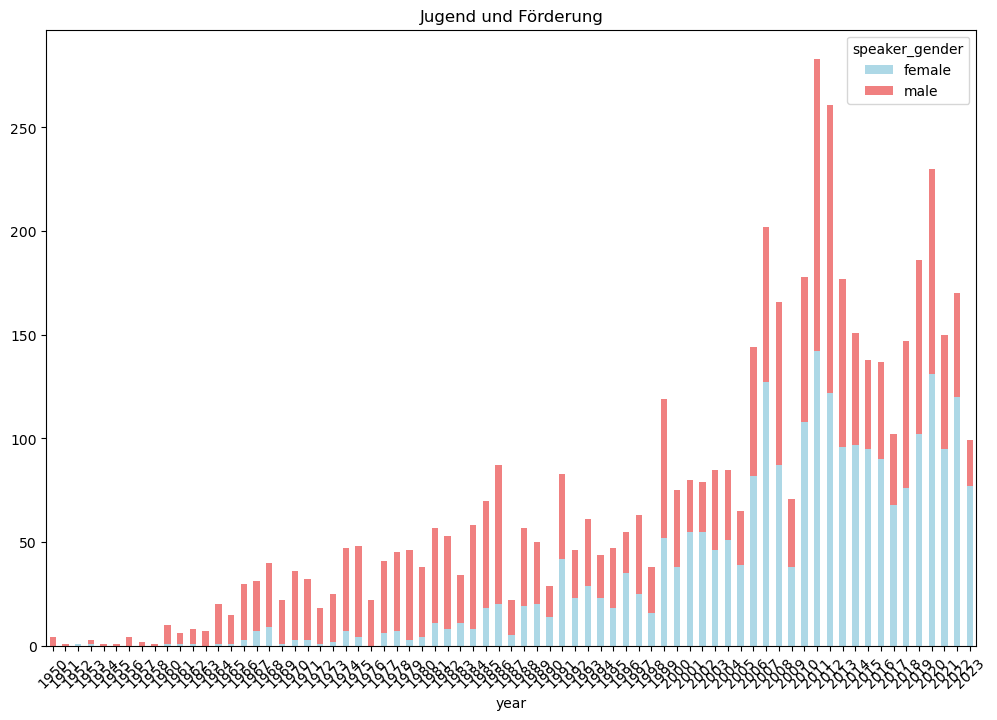

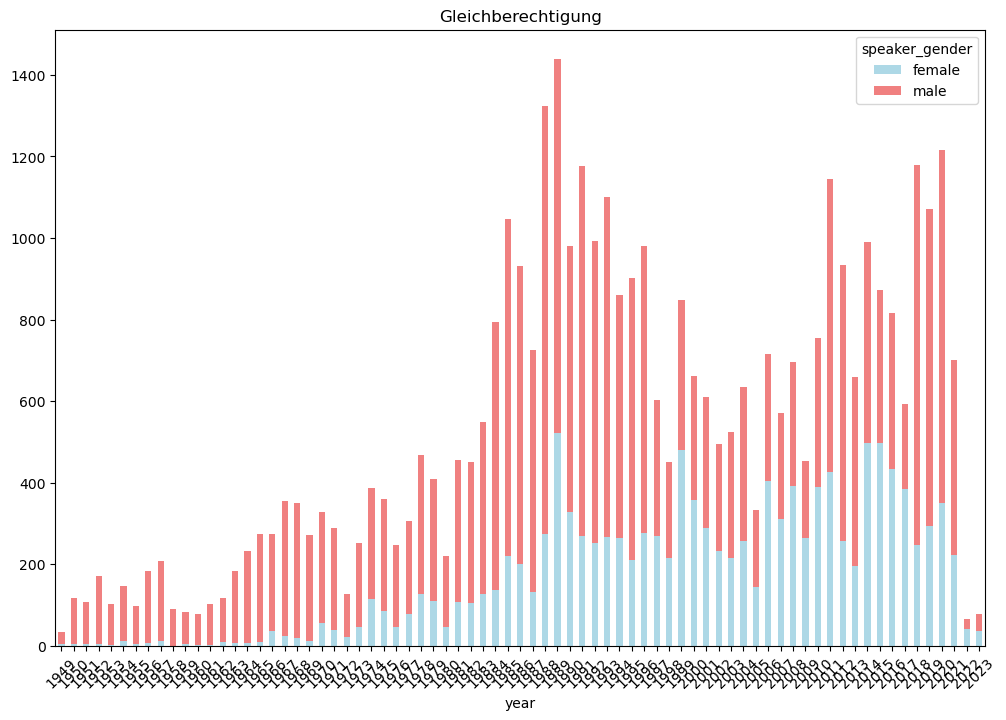

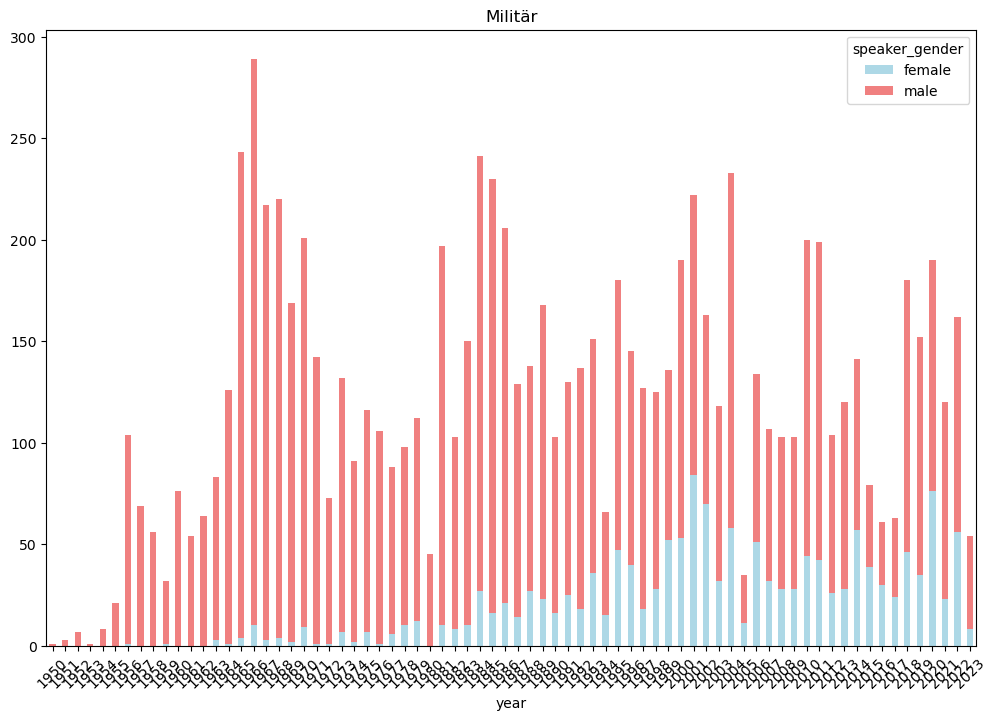

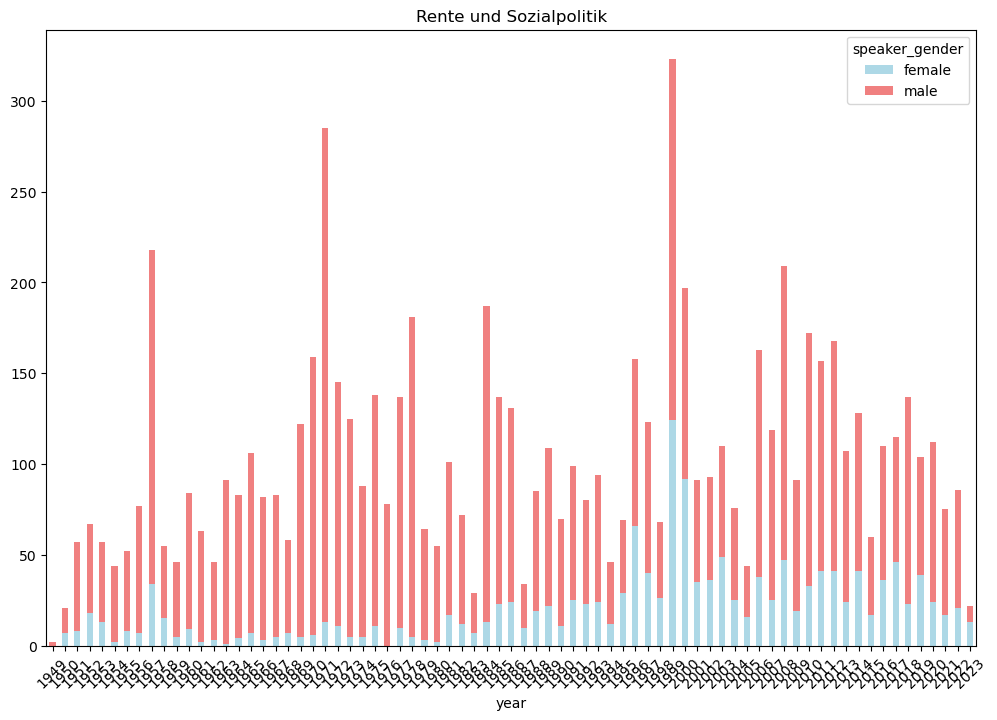

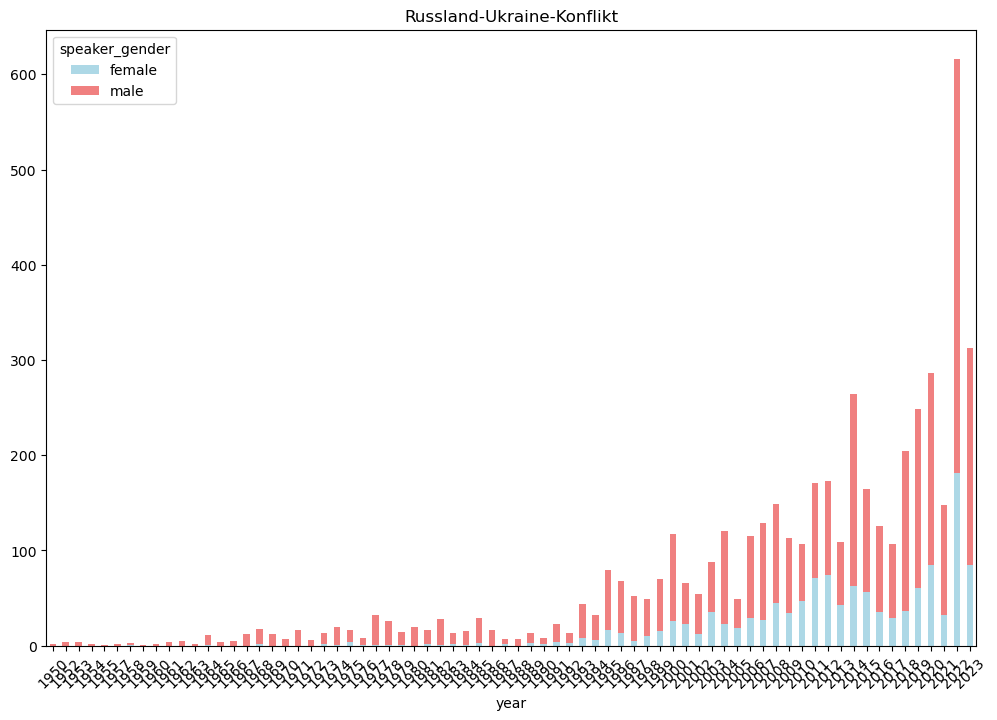

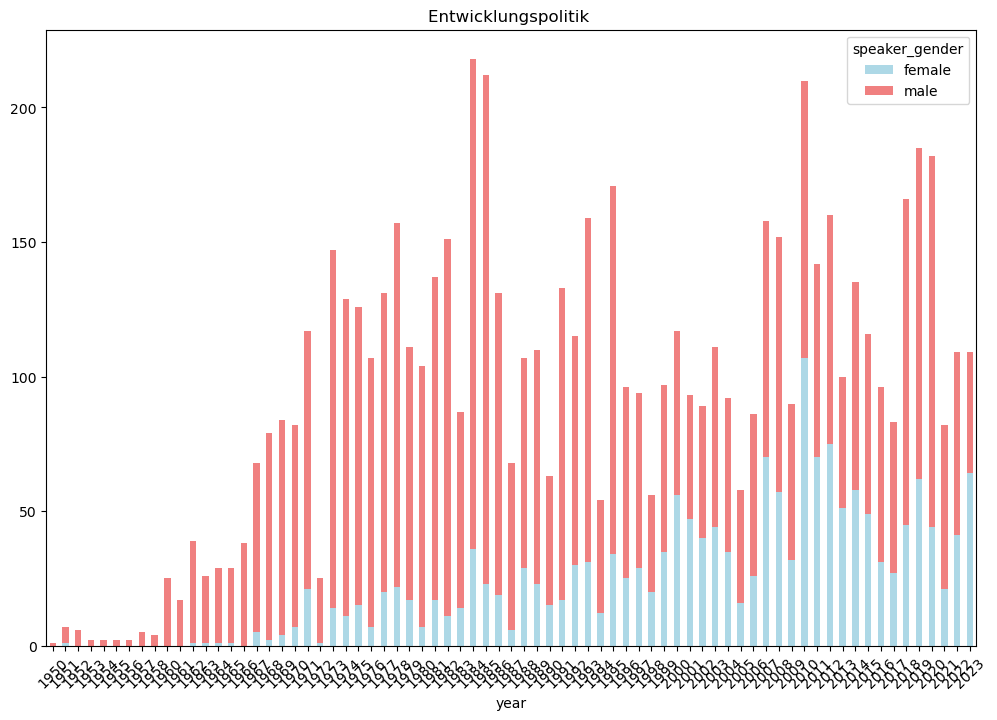

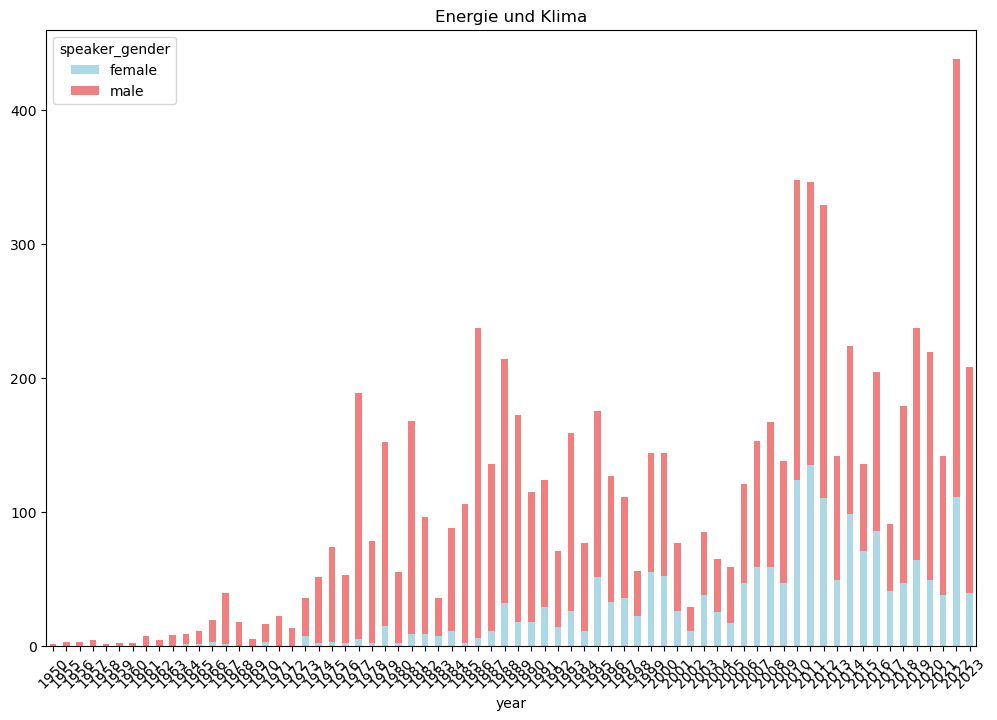

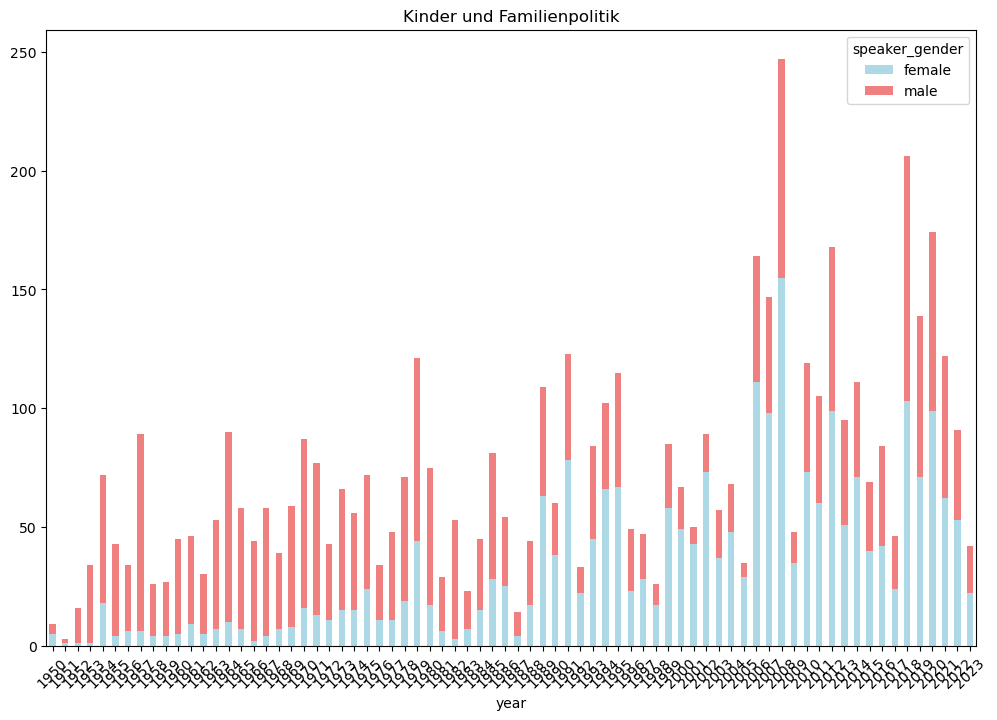

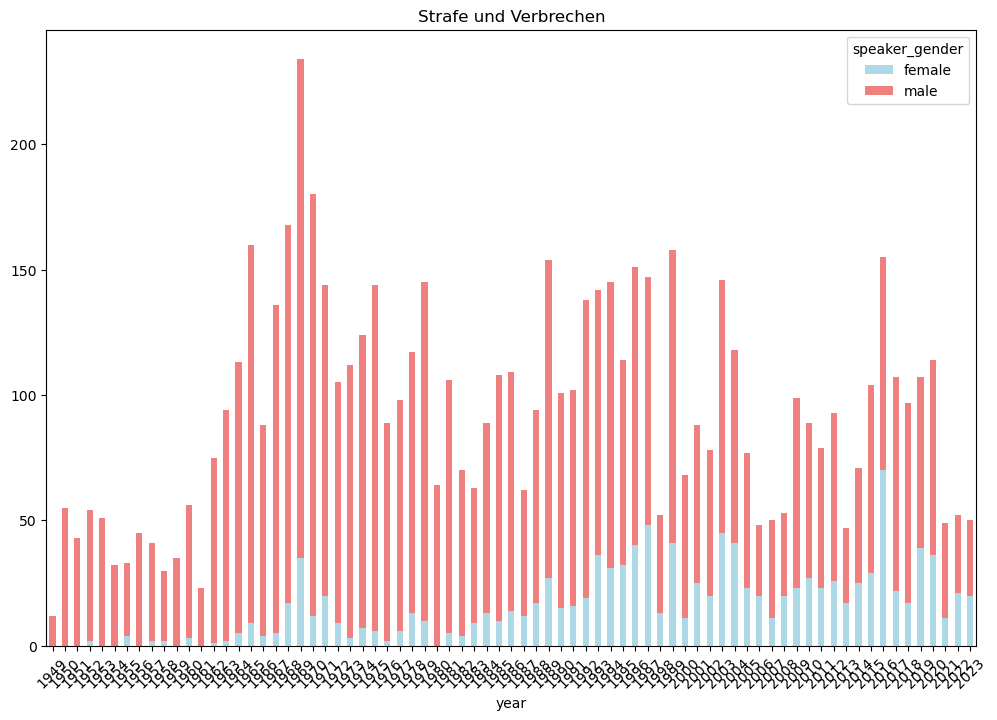

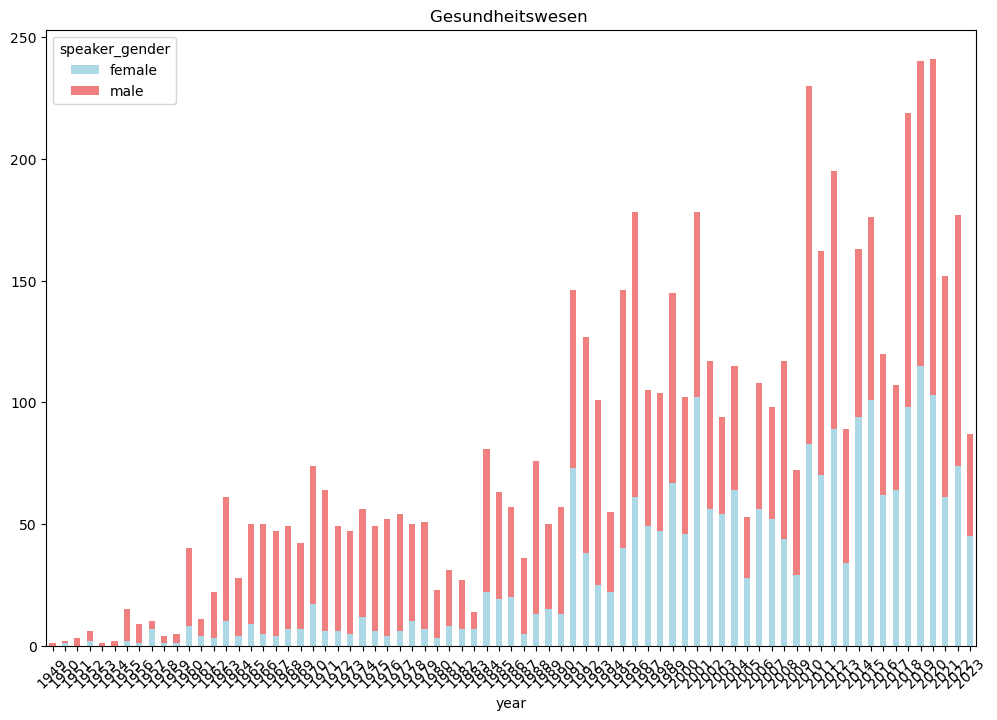

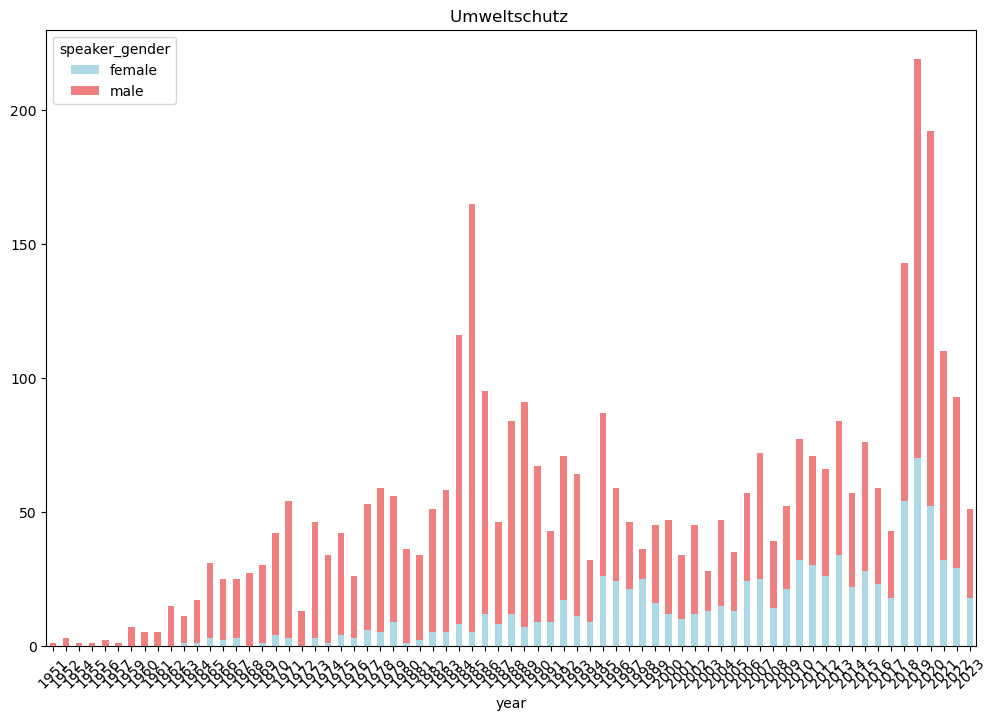

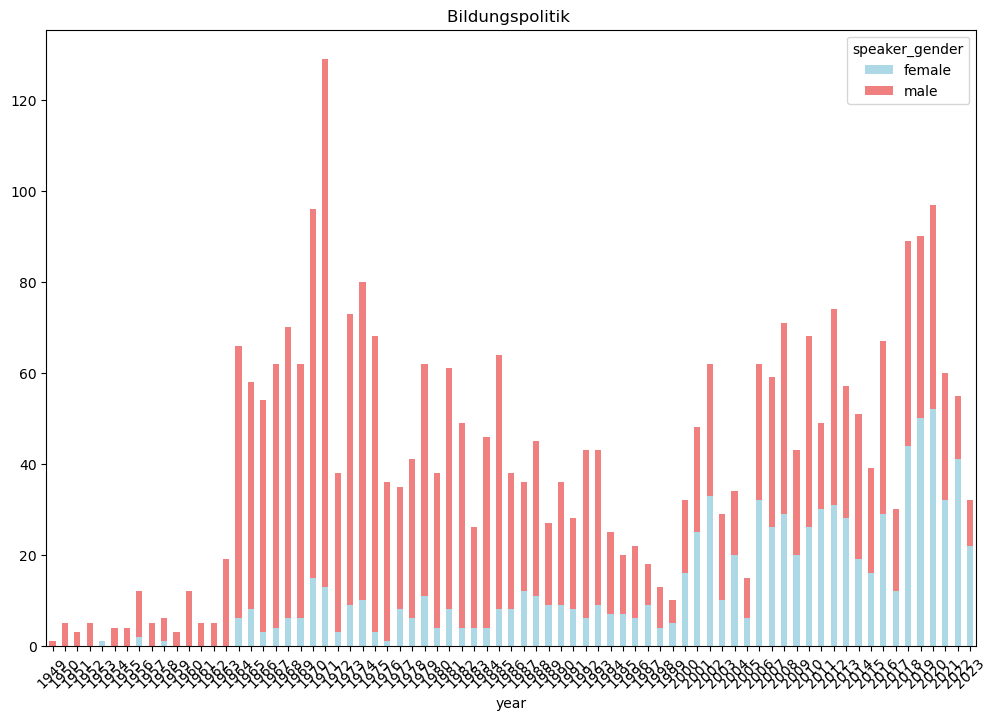

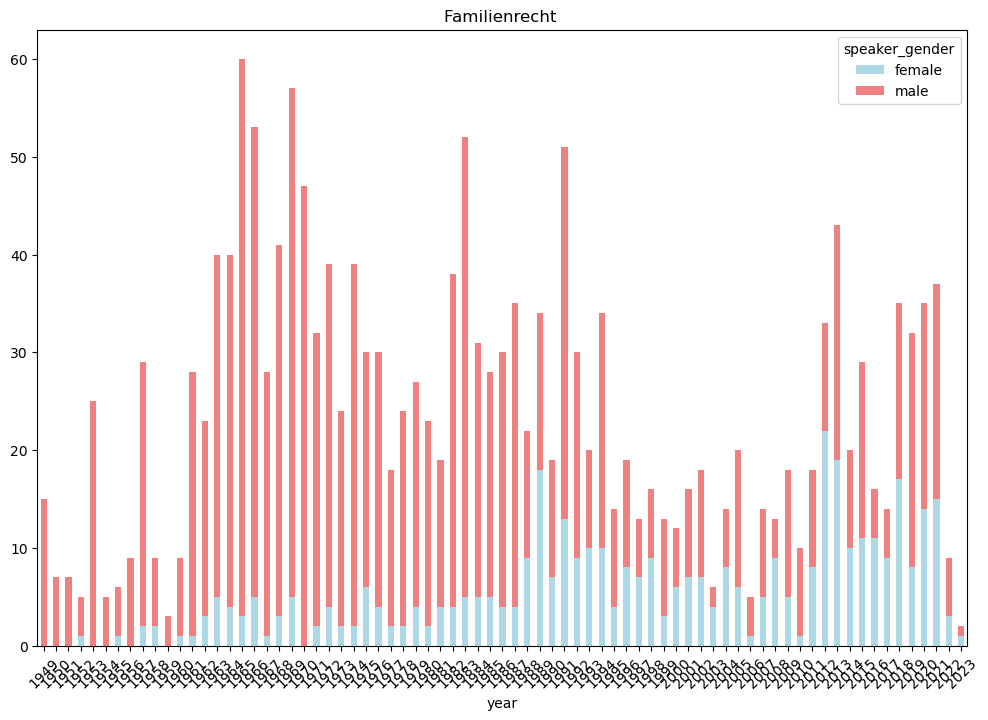

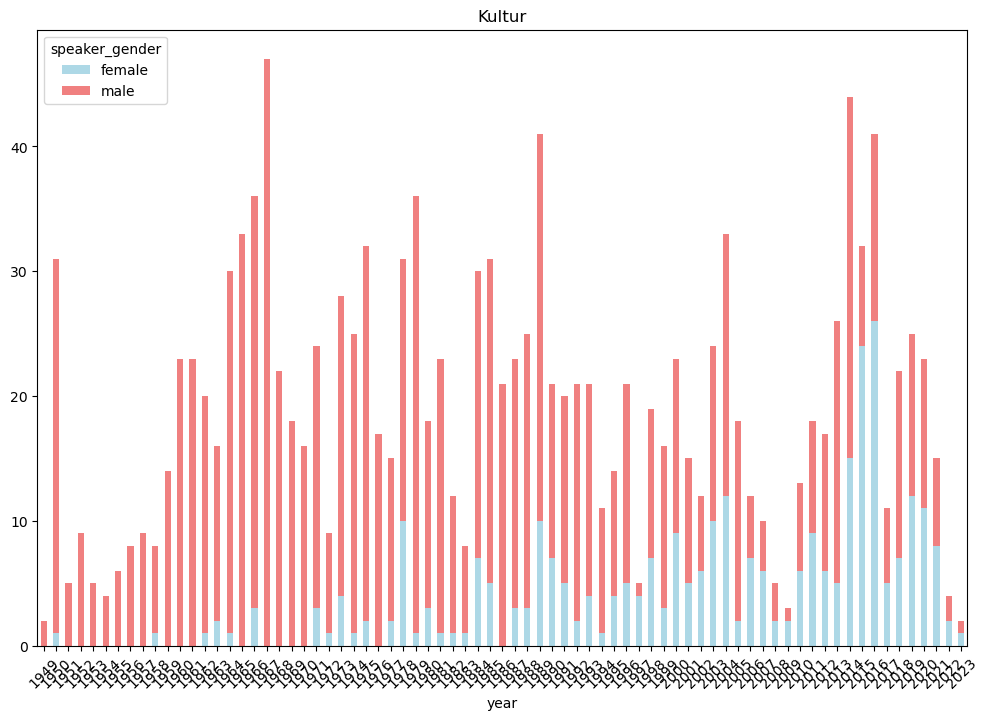

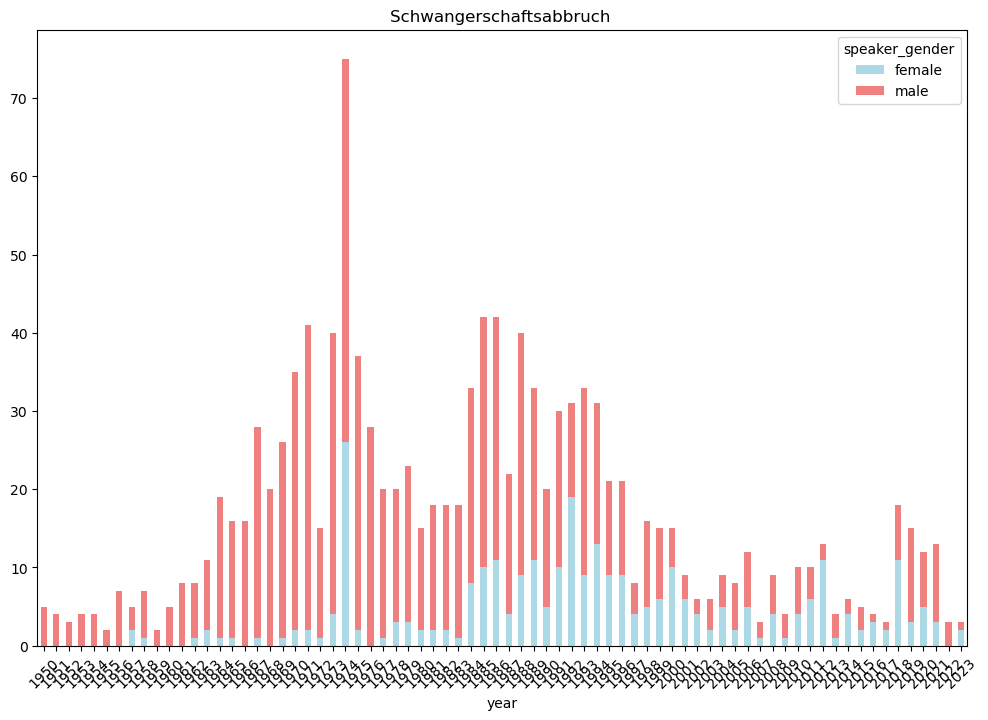

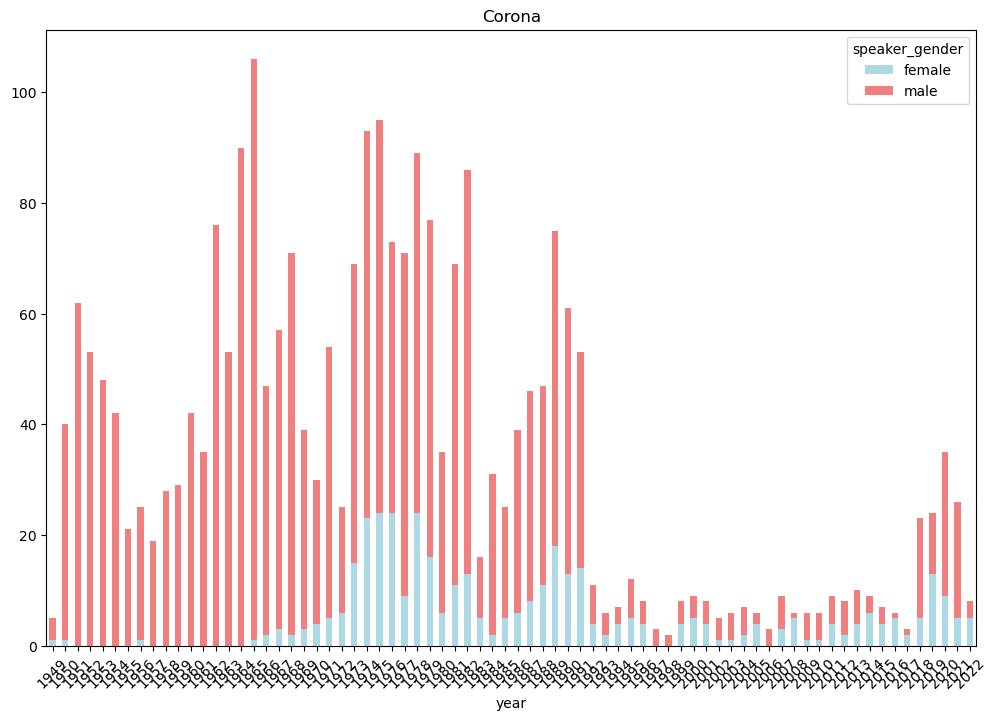

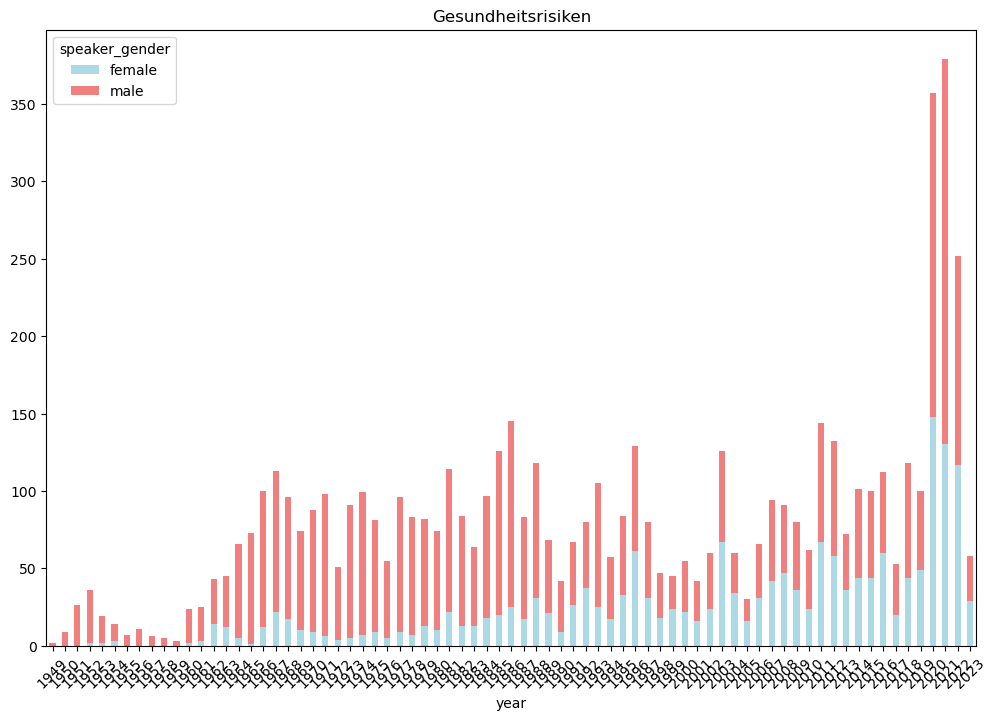

In [84]:
import numpy as np

for topic in topics_of_interest:
    topic_title = topics_of_interest[topic]

    filtered_df = df[df['topic_distribution'].apply(lambda topics: topic in topics)]

    speeches_per_year = filtered_df.groupby('year').size()
    speeches_per_gender = filtered_df.groupby('speaker_gender').size()
    #sum_speeches = speeches_per_gender.sum()

    # Group the DataFrame by year and speaker_gender, and count the occurrences
    grouped = filtered_df.groupby(['year', 'speaker_gender']).size().unstack()

    # Plotting the stacked bar plot
    ax = grouped.plot(kind='bar', 
                 stacked=True, 
                 color=['lightblue', 'lightcoral'], 
                 figsize=(12, 8),
                 title=topic_title,
                 #xticks=np.arange(0, 75, 10),
                 rot=45,
                 )
    ax.xaxis_date()
    
    #every_nth = 10
    #for n, label in enumerate(ax.xaxis.get_ticklabels()):
     #   if n % every_nth != 0:
      #      label.set_visible(False)

    

## Reference Graphic - Speeches per Year

In [28]:
total_speeches_per_year = df.groupby('year').size()

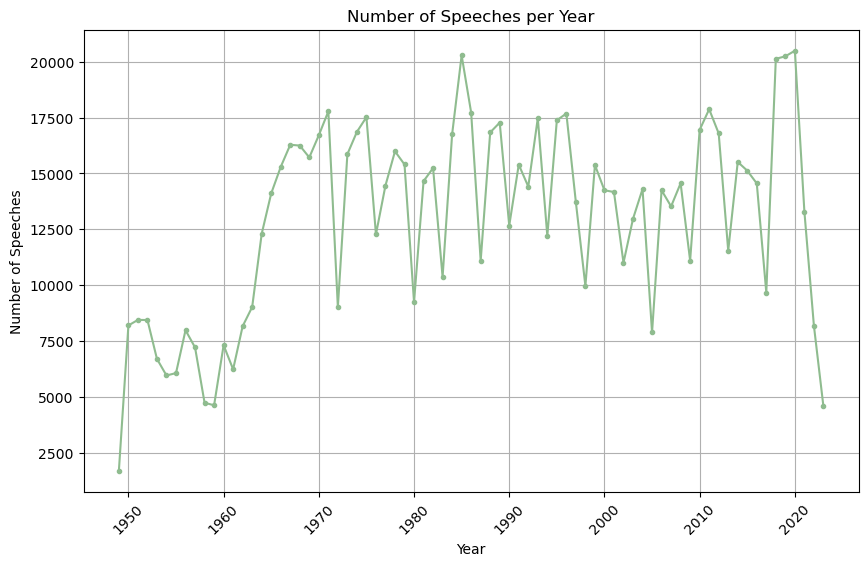

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.bar(total_speeches_per_year.index, total_speeches_per_year.values, color='darkseagreen')
plt.plot(total_speeches_per_year.index, 
         total_speeches_per_year.values, 
         marker='.', 
         linestyle='-', 
         color='darkseagreen')
plt.title('Number of Speeches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()